# Introduction to the dataset

## Contents:
* [Set-up](#setup)
* [Cardiotocography (CTG)](#ctg)
* [Abnormalities](#abnormal)
* [CTU-CHB Intrapartum Cardiotocography Database](#ctu_chb)
* [View example](#example)

## Set-up <a class='anchor' id='setup'></a>

In [1]:
# Load required packages
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Cardiotocography (CTG) <a class='anchor' id='ctg'></a>

Cardiotocography: Fetal heartbeat (*cardio*) + uterine contractions (*toco*) + drawing representing recording (*graphy*)

### When is CTG used?

In a normal low risk labour, fetal monitoring can be performed by intermittent ausculation (listening
to sounds) from the fetal heart using a pinard steothoscope (horn-shaped stethoscope) or Doppler
(ultrasound). If there are maternal or fetal conditions that increase the risk of intrapartum hypoxia, it is recommended to use continuous **electronic fetal monitoring (EFM), a.k.a. cardiotocography (CTG)**.[[source]](https://wisdom.nhs.wales/health-board-guidelines/swansea-bay-maternity-file/fetal-monitoring-abmu-maternity-guideline-2018-pdf/)

### How does it work?

CTG involves recording:
1. The **fetal heart rate (FHR)** (bpm)
2. The **maternal uterine contractions (UC)** (mmHg).[[source]](https://doi.org/10.1109/embc.2017.8037391)

The CTG monitor records FHR from a transducer placed on the woman’s abdomen (external monitoring) or an electrode placed on the fetal scalp (internal monitoring). CTG uses ultrasound to detect the hear rate. It is a high-frequency sound wave that travels freely through fluid and soft tissues, but will bounce back when it hits a hard surface like a heart valve. External monitoring uses a type of ultraound called a Doppler that measures moving structures. Internal monitoring uses a wire electrode attached to the baby's scalp that detects electrical signals from the baby's heart rate. It records UC through a transducer placed on the woman’s abdomen. This is based on how tense the abdomen is.[[source]](https://patient.info/pregnancy/cardiotocography).

This is an explanation from Chat-GPT although note I've not yet found official sources explaining how this all works to back it up:
1. Ultrasound Waves Emission: The ultrasound transducer emits these waves toward the fetus.
2. Reflection of Sound Waves: The waves encounter the moving structures within the fetus, particularly the heart, which causes some of the waves to bounce back toward the transducer.
3. Signal Reception: The transducer captures the reflected waves.
4. Conversion to Electrical Signals: The reflected waves are converted into electrical signals.
5. Signal Analysis: The cardiotocography machine analyzes the timing and pattern of these reflected signals. As the heart beats, there are changes in the timing and frequency of the reflected waves.
6. Heart Rate Calculation: Based on the intervals between these reflected waves, the CTG machine calculates the fetal heart rate in real time. It interprets these patterns to provide an ongoing measurement of the fetal heart rate, typically displayed in beats per minute (bpm) on a monitor or paper strip.


### How is it used?

**The FHR is plotted over time and interpreted in the context of the UC.**[[source]](https://resources.wfsahq.org/wp-content/uploads/uia29-Fetal-heart-rate-monitoring-%E2%80%93-principles-and-interpretation-of-cardiotocography.pdf)

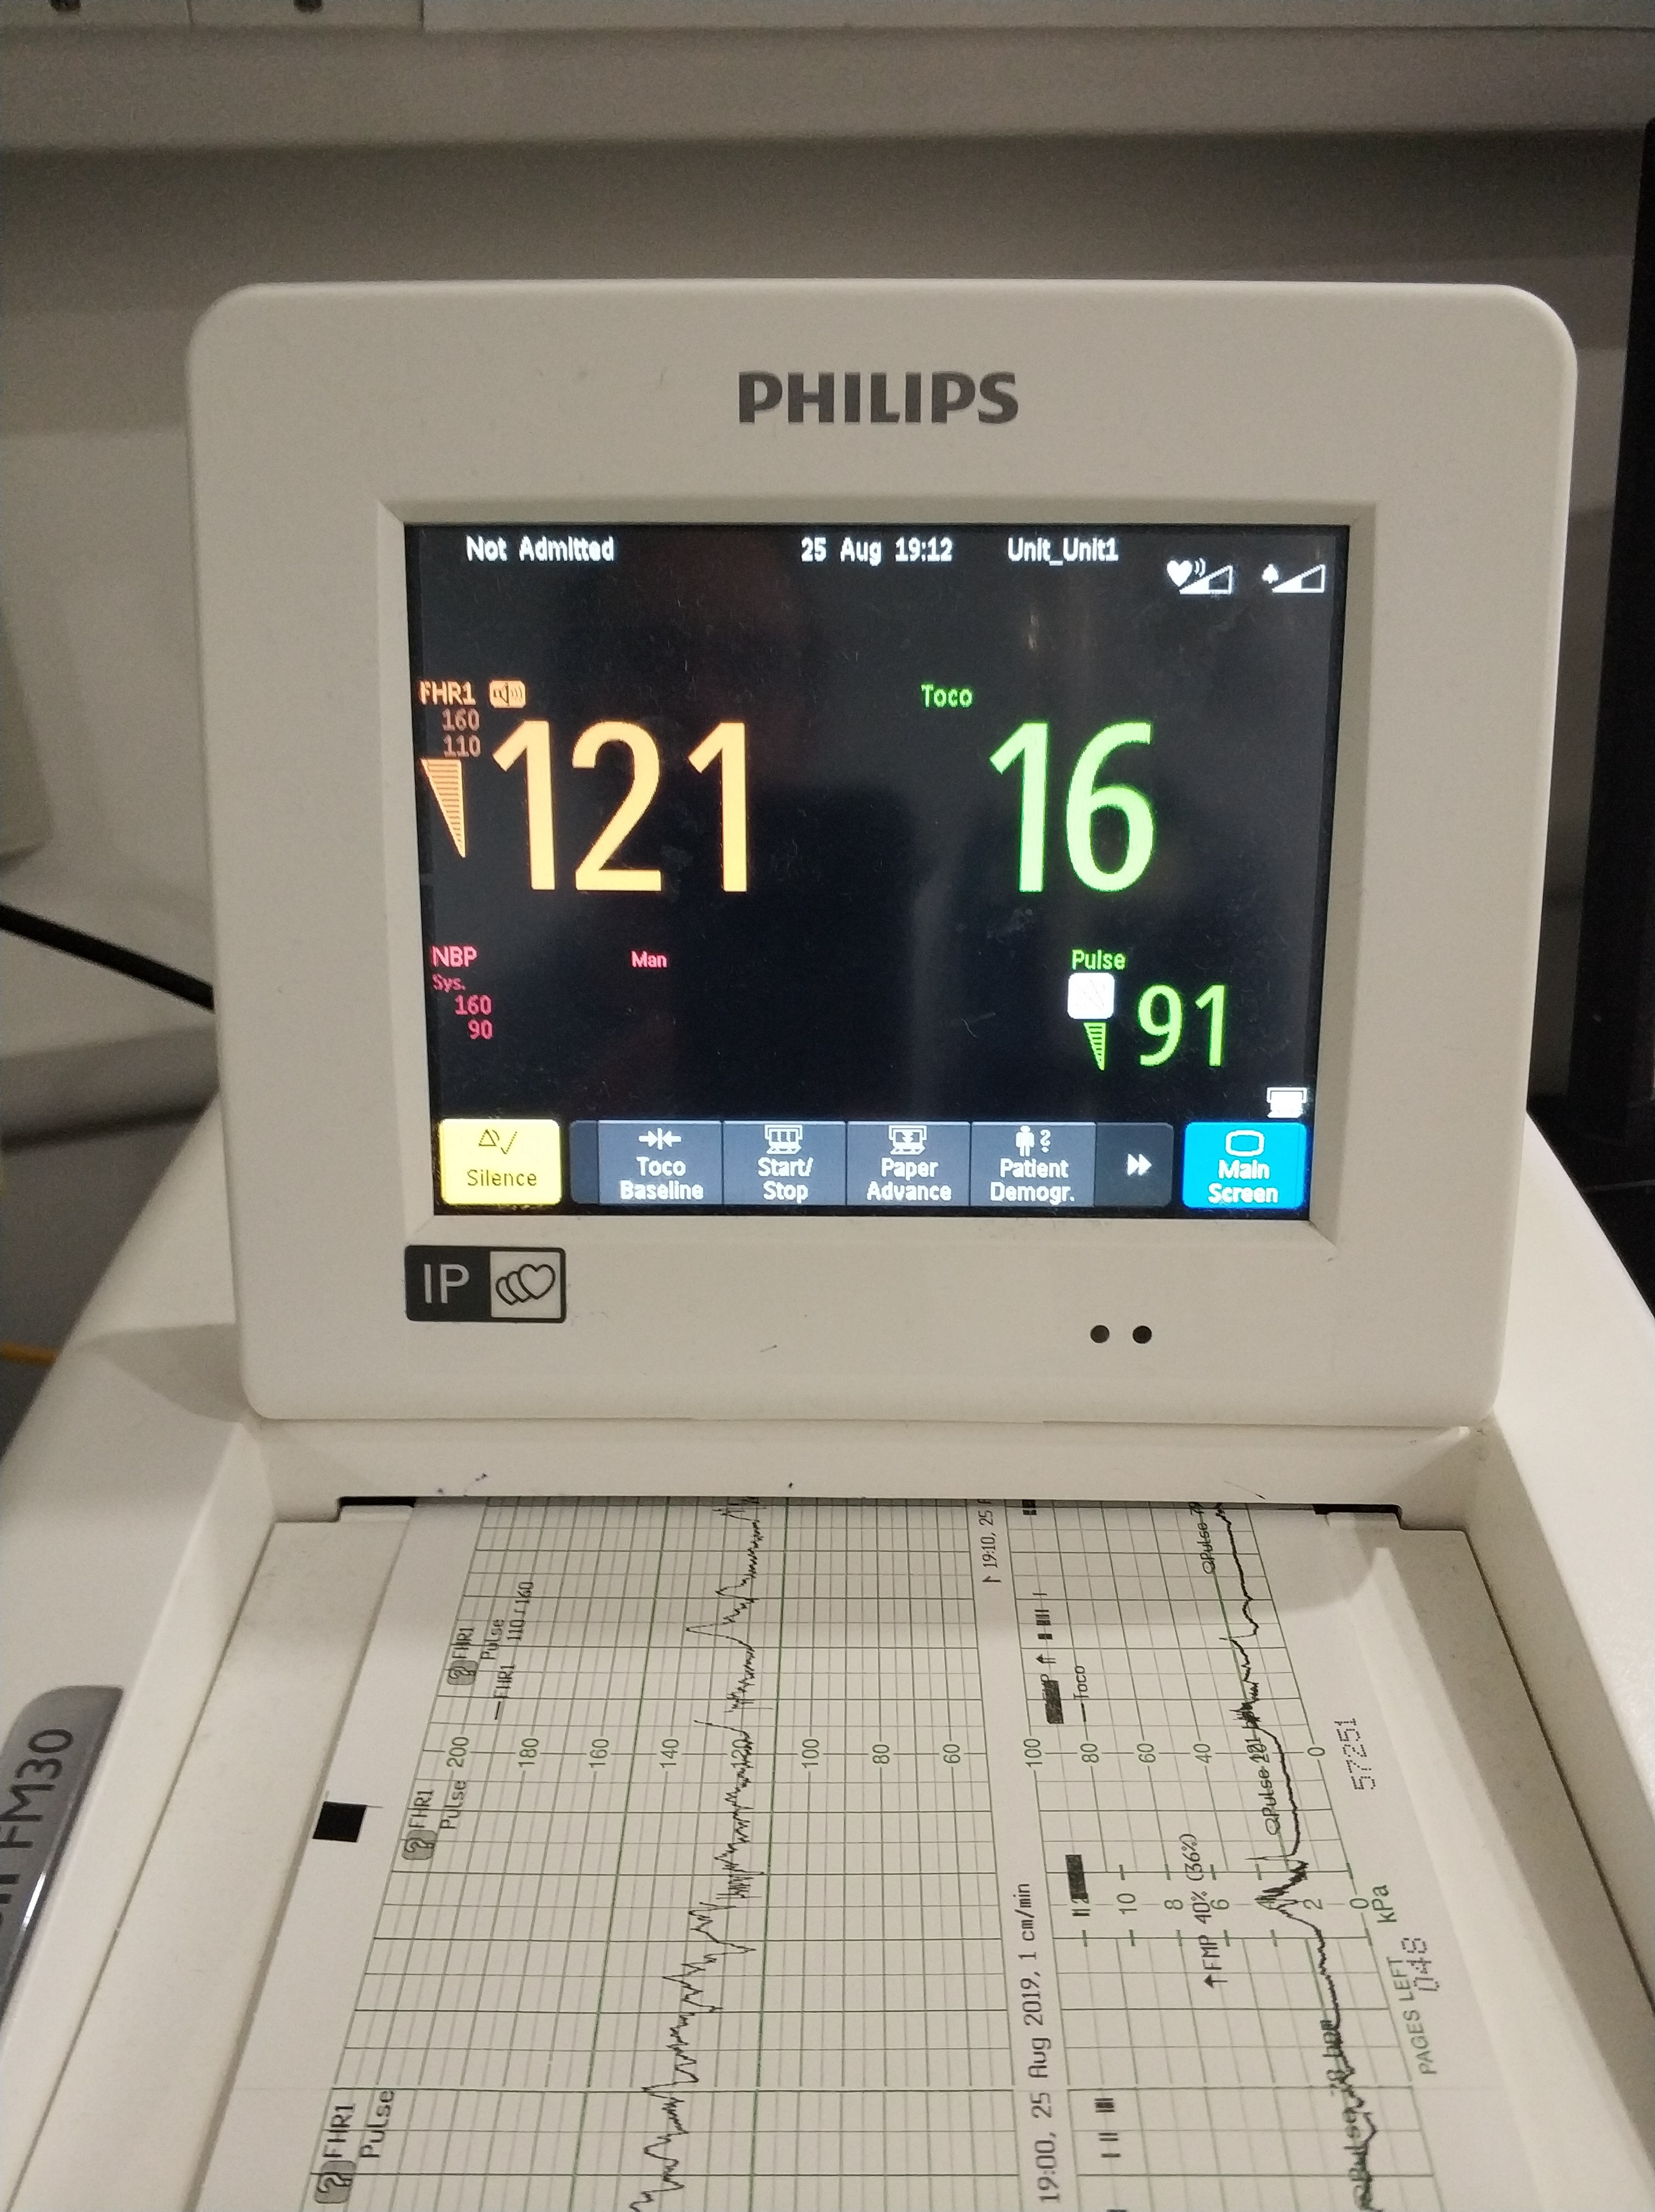

In [2]:
# Source: https://upload.wikimedia.org/wikipedia/commons/b/b6/Cardiotocography.jpg
Image('images/ctg.jpg')

## Abnormalities

A combination of abnormalities in the CTG indicate an increased likelihood of fetal distress - these include:
* **Baseline FHR outside normal range** (110-160bpm)
* **Baseline variability <5bpm** (variability is the beat-to-beat changes in FHR, which can measure by looking at highest and lowest rates in a 1-minute portion of the CTG trace, and we would expect to see normal variability of 5-15bpm)
* **Reduced or absent accelerations** (which are periodic, transient increases in FHR of >15bpm for >15sec and are associated with fetal activity, indicating that the fetus is healthy)
* **Presence of decelerations** (periodic, transient decreases in FHR, usually associated with UC and categorised in terms of how they occur in relation to UC - either as early, late, variable or prolonged declerations)

CTGs are categorised as normal, suspicious or pathological. Many UK maternity units use the sticker
below to monitor and classify (see grey highlighted row), which is adapted from NICE recommendations.
As in the sticker -
* Normal CTG - all four features reassuring
* Suspicious CTG - one non-reassuring feature
* Pathological CTG - two+ non-reassuring features, or one+ abnormal features

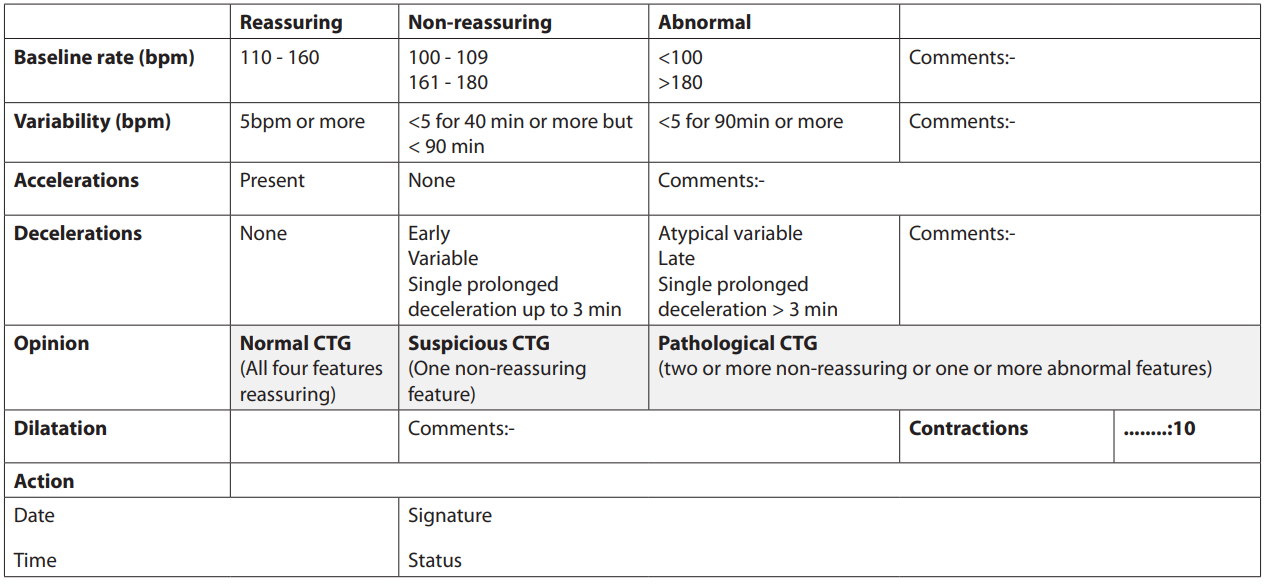

In [3]:
# Source: https://resources.wfsahq.org/wp-content/uploads/uia29-Fetal-heart-rate-monitoring-%E2%80%93-principles-and-interpretation-of-cardiotocography.pdf
Image('images/classify_ctg.png')

## Poor outcomes

Non-reassuring fetal status can lead to a spectrum of outcomes from a healthy child (due to false positive) through to death.

One focus can be **intrapartum  hypoxia (birth asphyxia)**. Hypoxia is low levels of oxygen in body tissues. Intrapartum is the time period from onset of labour to delivery of the placenta. Intrapartum hypoxia contributes to almost a quarter of neonatal deaths and almost half of still births.[[source]](https://www.frontiersin.org/articles/10.3389/frai.2021.765210/full) Proxy measures of hypoxia include:
* **Umbilical cord pH** - if the fetus experiences oxygen deficiency during labour, it leads to acidosis (low pH) - for example, metabolic acidosis is when the fetus has to use anaerobic metabolism due to lack of oxygen, thereby creating lactic acid and decreasing the pH.[[source]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6111374/) This measure can have an ambiguous correlation with poor outcomes though, since we record the umbilical venous pH but the arterial pH can be significantly lower than the venous pH for infants exposed to acute cord compression shortly before delivery.
* **Lactate**
* **Base deficit**
* **Transfer to NICU**
* **Apgar score** - though should note this (a) this is subjective, and (b) this is not designed to measure intrapartum hypoxia.
In studies using pH as an outcome, there is variation in the threshold used, with examples like pH less than 7.0, 7.05 or 7.2.

An example of the ambiguous relationship between pH and a concerning CTG can be seen in the CTU-CHB database. Of 552 patients, 44 have a pH less than 7.05, but annotation by three experts of the same dataset identified 149/552 normal CTG, 275/552 suspect CTG, and 115/552 pathological CTG.[[source]](https://www.frontiersin.org/articles/10.3389/frai.2021.765210/full)


## Variability in CTG interpretation

There is **high inter-observer variability in CTG interpretation**. This is a common reason why studies investigate using deep learning methods to classify CTG scans as pathological or not. If models are trained based on human labels - from an expert annotating the CTG scan - you can see good agreement between the algorithms and human labels, but it doesn't serve as a good decision-support tool, as its just like adding another evaluator with similar instructions rather than offering anything new to what the expert might notice.[[source]](https://www.frontiersin.org/articles/10.3389/frai.2021.765210/full)

## Challenges in CTG classification

Beyond the issues related to outcome measurement and interpretation mentioned above, other challenges include:
* **Class imbalance** between control and pathological patients
* **Acute events** like a cord prolapse or acute cord compression will only occur in a short section of the CTG, and labelling the whole CTG as pathological could introduce noise and misclassification
* **No signs on CTG** - sometimes, there is no evidence of a poor outcome like hypoxia from the CTG
* **Stage of labour** - a feature/pattern might be considered non-reassuring in the first stage of labour but normal in the second stage where contractions become more intense. It's likely that the later stages of the CTG contain data pertaining to outcome as the CTG ends with the time of birth - however, there is also more noise and motion artifacts. Classifier performance varies with the stage of labour. Therefore many studies will omit second stage data - but that may reduce the clinical usefulness of a decision support tool in practice [[source]](https://www.frontiersin.org/articles/10.3389/frai.2021.765210/full)
* **Complexity of FHR** - There has been significant progress in the domain of adult heart rate variability but not for FHR. The visual inspection of FHR is tricky because of the complexity of FHR dynamics, regulated by several neurological feedback loops. The application of most clinical guidelines often result in significant inter- and intra-observed variability. This drives the force of the search for an objective evaluation of the CTG signal.[[source]](https://link.springer.com/chapter/10.1007/978-3-319-64265-9_9)
* **Other factors** - Many studies have showed that the CTG signal itself is not sufficient and that supplemental clinical information is needed for making the correct decision like - APGAR score; Biochemical markers (pH value, base excess, base deficit); Family and mother anamneses, risk factors and other factors

## Discussion around use of CTG and outcomes

[This article](https://ecochildsplay.com/2019/03/20/continuous-fetal-monitoring-during-labor-leads-to-unnecessar%E2%80%8B%E2%80%8B%E2%80%8By-interventions/) provides examples of narratives around CTG and it's relationship with interventions and outcomes.

Example: *"when you compare the labors of women with low-risk pregnancies who have been monitored continuously to labors of women who have not, the babies come out about the same. But the continuously monitored mothers are subjected to significantly more interventions—oxytocin stimulation, forceps deliveries, episiotomies, C-sections, etc.—with their attendant expenses and complications."*

It's worth bearing in mind that the use of CTG itself can have a relationship with outcomes, and that CTG is not used in all pregnancies.

## CTU-CHB Intrapartum Cardiotocography Database <a class='anchor' id='ctu_chb'></a>

In this project, we are using CTG recordings from the [CTU-CHB Intrapartum Cardiotocography Database](https://doi.org/10.13026/C22013). It has 552 CTG recordings, each - according to PhysioNet - no longer than 90 minutes. Characteristics include that these are singleton pregnancies, no a priori known developmental defects, stage 2 labour at least 30 minutes, FHR signal quality > 50% in each 30 minutes window. Additional parameters are available including maternal, delivery, and fetal outcome data.

The FHR and UC were sampled at 4Hz, meaning we have four rows per second. The index column `quarter_second` is just a consecutive count from 0, where 0-3 are the first second, 4-7 are the next second, and so on.

## View example <a class='anchor' id='example'></a>

### Load all files and get filename of the first record

In [4]:
# Set up dictionary for CSV files
csv_files = dict()

# Load files into dictionary
filenames = os.listdir('./data_csv')
for file in filenames:
    filename, file_extension = os.path.splitext(f'./data_csv/{file}')
    # Remove path from filenmaes and load data
    if file_extension == '.csv':
        filename_short = filename.split('/')[-1]
        csv_files[filename_short] = pd.read_csv(f'./data_csv/{file}')

# Load meta data and transform
metadata = pd.read_csv('./data_csv/metadata.csv', index_col='parameter')
csv_index = list(metadata)

# Get filename for first record
index = csv_index[0]
print(index)

1347


### Preview signal data

Time series data - FHR and UC per quarter second.

In [5]:
# Preview the FHR and UC for this record
signal = csv_files[index]
signal

,quarter_second,FHR,UC,second,minute
0,0,128.50,21.5,0,0
1,1,128.00,21.5,0,0
2,2,128.00,21.5,0,0
3,3,127.25,21.5,0,0
4,4,127.25,21.0,1,0
...,...,...,...,...,...
17995,17995,126.00,10.5,4498,74
17996,17996,126.00,10.5,4499,74
17997,17997,126.25,10.5,4499,74
17998,17998,126.25,10.5,4499,74


In [6]:
# Show record length
q_sec = signal['quarter_second'].max() + 1
sec = signal['second'].max() + 1
min = signal['minute'].max() + 1
print(f'{q_sec} quarter seconds or {sec} seconds or {min} minutes')

18000 quarter seconds or 4500 seconds or 75 minutes


### Preview meta data 

Includes parameters like pH from analysis of umbilical artery blood sample.

In [7]:
metadata[index].head(15)

parameter
pH                7.14
BDecf             8.60
pCO2              7.50
BE              -10.80
Apgar1           10.00
Apgar5           10.00
NICU days         0.00
Seizures          0.00
HIE               0.00
Intubation        0.00
Main diag.        0.00
Other diag.       0.00
Gest. weeks      40.00
Weight(g)      3190.00
Sex               1.00
Name: 1347, dtype: float64

### Plot the signal data

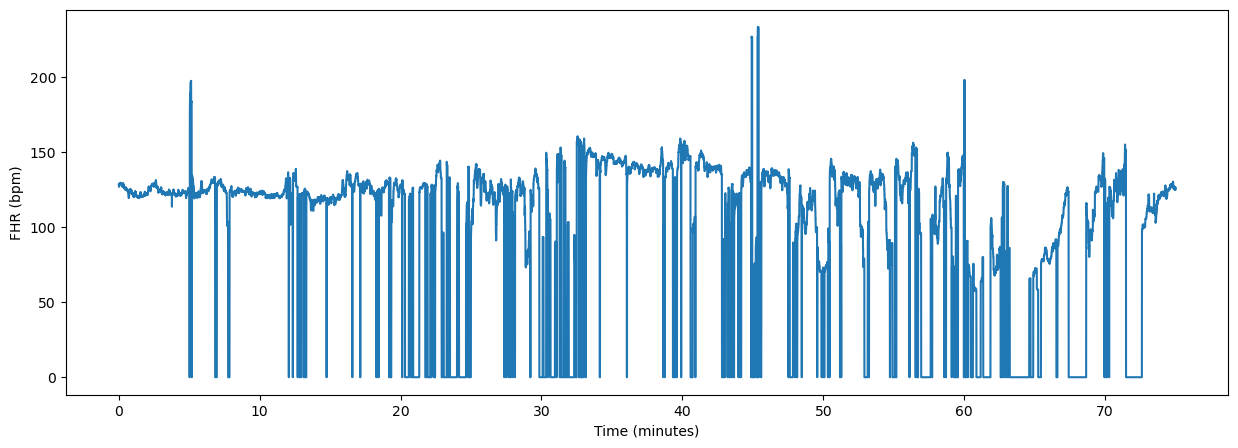

In [8]:
# Initialise figure
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the signal with x axis in minutes
ax.plot(signal.quarter_second/(60*4), signal.FHR)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('FHR (bpm)')

plt.show()

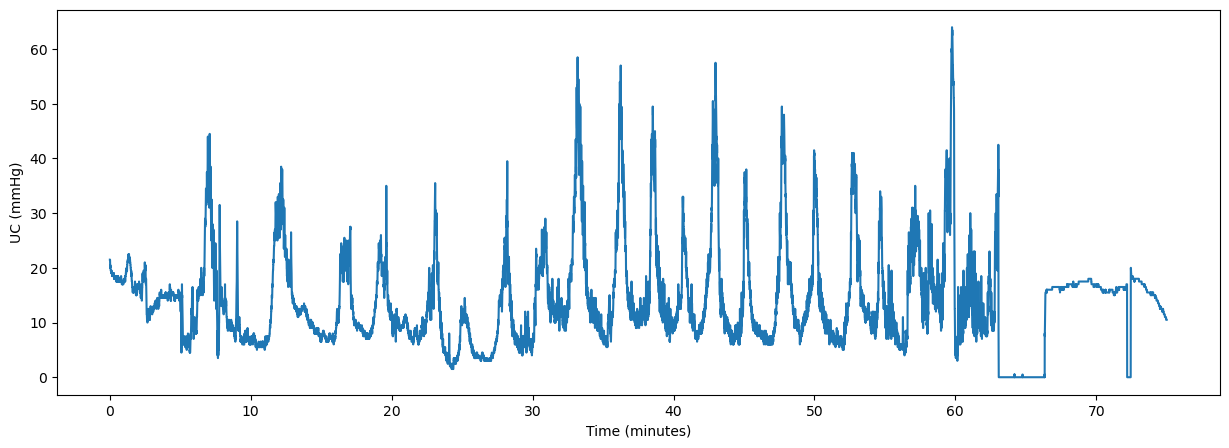

In [9]:
# Initialise figure
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the signal with x axis in minutes
ax.plot(csv_files[index].quarter_second/(60*4), csv_files[index].UC)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('UC (mmHg)')

plt.show()

## Show distribution of outcomes that can be used to indicate fetal distress

Examples:
* Fetal acidemia: pH < 7.2
* Significant fetal acidemia: pH < 7.0
* Metabolic acidosis: pH < 7.05 and BDecf > 10mmol/l
* Metabolic acidosis: pH < 7.05 and lactcate > 10 mmol/l
* Apgar score relates to whether newborn needs help breathing or is having heart problems. Apgar1 is one minute after birth, apgar5 is five minutes after birth. A 5-minute Apgar score of 7-10 is reassuring, below is concerning
* Transfer to NICU
* HIE (hypoxic ischemic encephalopthy)

In [10]:
fetal_acidemia = metadata.loc['pH'] < 7.2
fetal_acidemia.value_counts()

pH
False    375
True     177
Name: count, dtype: int64

In [11]:
sig_fetal_acidemia = metadata.loc['pH'] < 7
sig_fetal_acidemia.value_counts()

pH
False    532
True      20
Name: count, dtype: int64

In [12]:
# No lacatate apparent in metadata
metabolic_acidosis = np.logical_and(metadata.loc['pH'] < 7.05,
                                    metadata.loc['BDecf'] > 10)
metabolic_acidosis.value_counts()

False    529
True      23
Name: count, dtype: int64

In [13]:
apgar = metadata.loc['Apgar5'] < 7
apgar.value_counts()

Apgar5
False    533
True      19
Name: count, dtype: int64

In [14]:
metadata.loc['NICU days'].value_counts()

NICU days
0.0    552
Name: count, dtype: int64

In [15]:
metadata.loc['HIE'].value_counts()

HIE
0.0    552
Name: count, dtype: int64

In [16]:
np.logical_or(sig_fetal_acidemia, metabolic_acidosis, apgar).value_counts()

Apgar5
False    525
True      27
Name: count, dtype: int64